In [1]:
!pip install opencv-contrib-python

  Using cached opencv_contrib_python-4.13.0.90-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_contrib_python-4.13.0.90-cp37-abi3-win_amd64.whl (46.5 MB)


In [1]:
# Quick download script
import urllib.request

urls = {
    'box1.jpg': 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/box.png',
    'box2.jpg': 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/box_in_scene.png'
}

for filename, url in urls.items():
    urllib.request.urlretrieve(url, filename)
    print(f"✓ Downloaded {filename}")


✓ Downloaded box1.jpg
✓ Downloaded box2.jpg


PART 0: Loading Images
✓ Loaded: box.png and box1.jpg
Image 1 shape: (223, 324, 3)
Image 2 shape: (223, 324, 3)


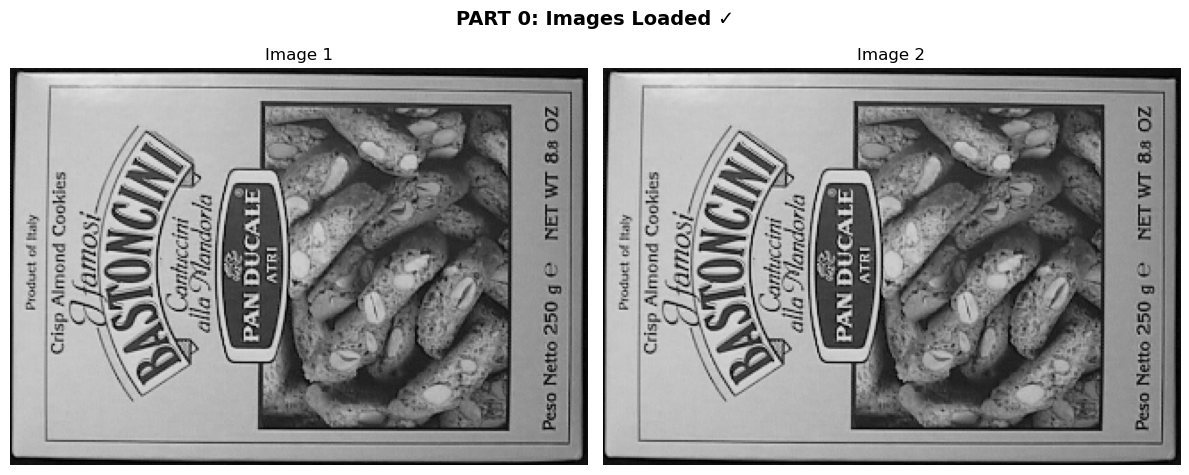

✓ PART 0 COMPLETE



In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# ═══════════ PART 0: LOAD IMAGES ═══════════
print("PART 0: Loading Images")
print("="*50)

# Method 1: Auto-find images
image_files = [f for f in os.listdir('.') if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

if len(image_files) >= 2:
    img1 = cv2.imread(image_files[0])
    img2 = cv2.imread(image_files[1])
    print(f"✓ Loaded: {image_files[0]} and {image_files[1]}")
else:
    # Method 2: Manual paths (UPDATE THESE!)
    img1 = cv2.imread('image1.jpg')  # ← Change this
    img2 = cv2.imread('image2.jpg')  # ← Change this
    print("✓ Loaded images from manual paths")

# Check if loaded
if img1 is None or img2 is None:
    print("❌ ERROR: Could not load images!")
    print("Put 2 images in the folder or update paths above")
    exit()

# Convert to grayscale (feature detectors work on grayscale)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

print(f"Image 1 shape: {img1.shape}")
print(f"Image 2 shape: {img2.shape}")

# Quick preview
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axes[0].set_title('Image 1')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axes[1].set_title('Image 2')
axes[1].axis('off')

plt.suptitle('PART 0: Images Loaded ✓', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("✓ PART 0 COMPLETE\n")


# SIFT 

PART 1: SIFT (Scale-Invariant Feature Transform) Detection
✓ SIFT detector created
  Parameters: nfeatures=1000 (top 1000 keypoints)

📍 Detection Results:
  Image 1: 604 SIFT keypoints detected
  Image 2: 604 SIFT keypoints detected
  Descriptor shape: (604, 128)
  Descriptor type: 128-dimensional float vector


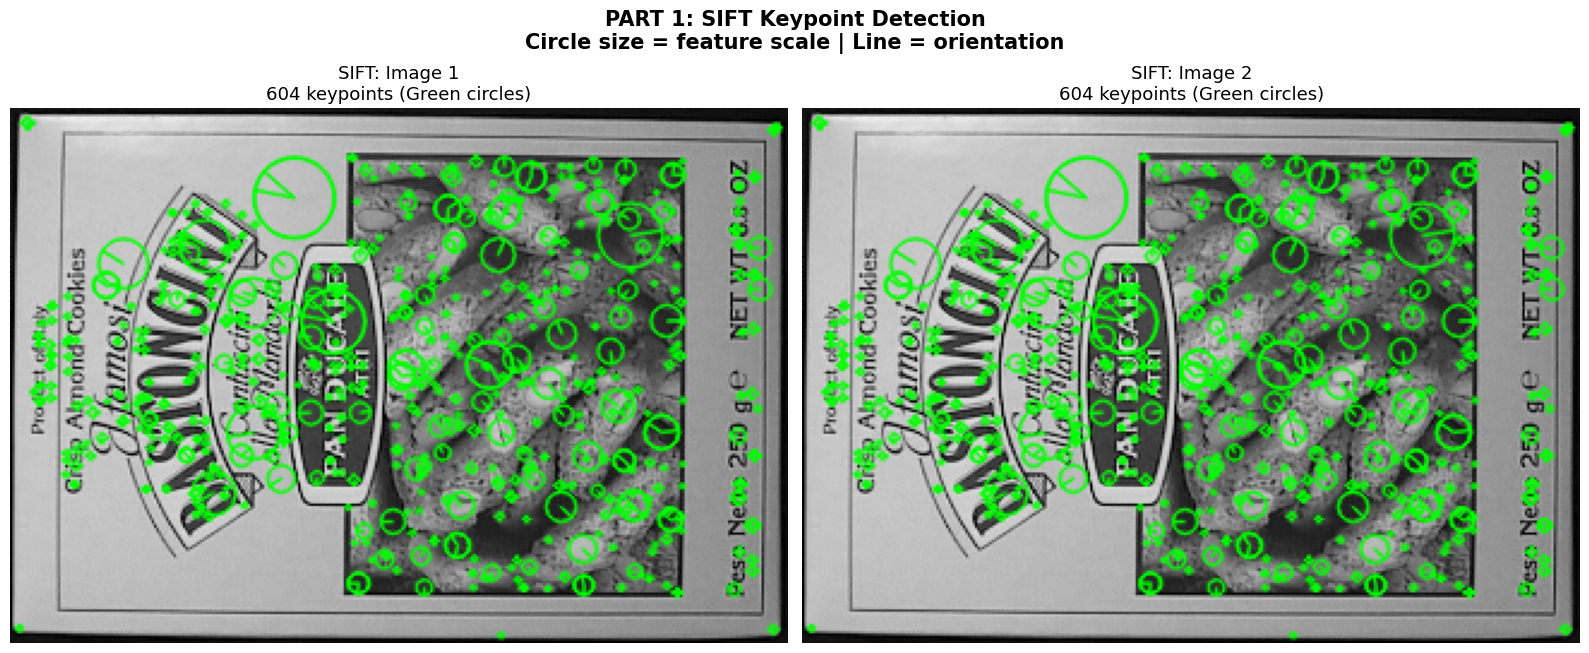


💡 What SIFT detected:
  • Corners (high gradient in multiple directions)
  • Blobs (scale-space extrema)
  • Edges with distinctive texture

✅ PART 1 COMPLETE - SIFT keypoints detected!



In [10]:
# ═══════════════════════════════════════════════════
# PART 1: SIFT FEATURE DETECTION
# ═══════════════════════════════════════════════════
print("="*70)
print("PART 1: SIFT (Scale-Invariant Feature Transform) Detection")
print("="*70)

# Create SIFT detector object
sift = cv2.SIFT_create(nfeatures=1000)  # Limit to 1000 best features
print("✓ SIFT detector created")
print("  Parameters: nfeatures=1000 (top 1000 keypoints)")

# Detect keypoints AND compute descriptors in one call
kp1_sift, des1_sift = sift.detectAndCompute(gray1, None)
kp2_sift, des2_sift = sift.detectAndCompute(gray2, None)

print(f"\n📍 Detection Results:")
print(f"  Image 1: {len(kp1_sift)} SIFT keypoints detected")
print(f"  Image 2: {len(kp2_sift)} SIFT keypoints detected")
print(f"  Descriptor shape: {des1_sift.shape}")
print(f"  Descriptor type: 128-dimensional float vector")

# Draw keypoints on images (green circles with orientation lines)
img1_sift = cv2.drawKeypoints(
    img1, kp1_sift, None,
    color=(0, 255, 0),  # Green color
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS  # Show size & orientation
)

img2_sift = cv2.drawKeypoints(
    img2, kp2_sift, None,
    color=(0, 255, 0),
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# Visualize SIFT keypoints
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

axes[0].imshow(cv2.cvtColor(img1_sift, cv2.COLOR_BGR2RGB))
axes[0].set_title(f'SIFT: Image 1\n{len(kp1_sift)} keypoints (Green circles)', fontsize=13)
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(img2_sift, cv2.COLOR_BGR2RGB))
axes[1].set_title(f'SIFT: Image 2\n{len(kp2_sift)} keypoints (Green circles)', fontsize=13)
axes[1].axis('off')

plt.suptitle('PART 1: SIFT Keypoint Detection\n' +
             'Circle size = feature scale | Line = orientation', 
             fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 What SIFT detected:")
print("  • Corners (high gradient in multiple directions)")
print("  • Blobs (scale-space extrema)")
print("  • Edges with distinctive texture")
print("\n✅ PART 1 COMPLETE - SIFT keypoints detected!")
print("="*70 + "\n")


PART 2: ORB (Oriented FAST and Rotated BRIEF) Detection
✓ ORB detector created
  Parameters: nfeatures=1500 (top 1500 keypoints)

📍 Detection Results:
  Image 1: 1252 ORB keypoints detected
  Image 2: 1252 ORB keypoints detected
  Descriptor shape: (1252, 32)
  Descriptor type: 256-bit binary vector


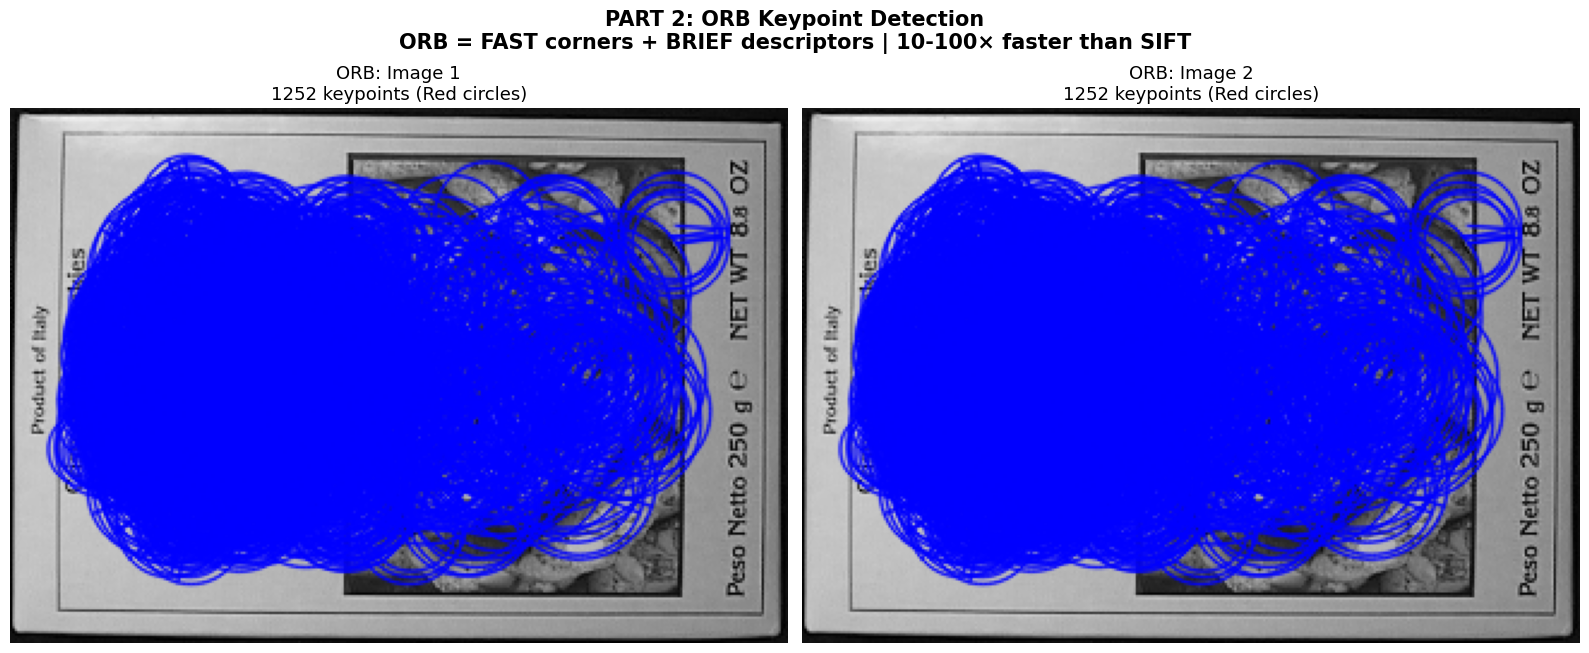


💡 ORB advantages:
  • Very fast (binary descriptors)
  • Free and open-source (BSD license)
  • Good rotation invariance
  • Perfect for real-time applications

✅ PART 2 COMPLETE - ORB keypoints detected!



In [11]:
# ═══════════════════════════════════════════════════
# PART 2: ORB FEATURE DETECTION
# ═══════════════════════════════════════════════════
print("="*70)
print("PART 2: ORB (Oriented FAST and Rotated BRIEF) Detection")
print("="*70)

# Create ORB detector object
orb = cv2.ORB_create(nfeatures=1500)  # Limit to 1500 features
print("✓ ORB detector created")
print("  Parameters: nfeatures=1500 (top 1500 keypoints)")

# Detect keypoints AND compute descriptors
kp1_orb, des1_orb = orb.detectAndCompute(gray1, None)
kp2_orb, des2_orb = orb.detectAndCompute(gray2, None)

print(f"\n📍 Detection Results:")
print(f"  Image 1: {len(kp1_orb)} ORB keypoints detected")
print(f"  Image 2: {len(kp2_orb)} ORB keypoints detected")
print(f"  Descriptor shape: {des1_orb.shape}")
print(f"  Descriptor type: 256-bit binary vector")

# Draw keypoints on images (red circles)
img1_orb = cv2.drawKeypoints(
    img1, kp1_orb, None,
    color=(255, 0, 0),  # Red color
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

img2_orb = cv2.drawKeypoints(
    img2, kp2_orb, None,
    color=(255, 0, 0),
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# Visualize ORB keypoints
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

axes[0].imshow(cv2.cvtColor(img1_orb, cv2.COLOR_BGR2RGB))
axes[0].set_title(f'ORB: Image 1\n{len(kp1_orb)} keypoints (Red circles)', fontsize=13)
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(img2_orb, cv2.COLOR_BGR2RGB))
axes[1].set_title(f'ORB: Image 2\n{len(kp2_orb)} keypoints (Red circles)', fontsize=13)
axes[1].axis('off')

plt.suptitle('PART 2: ORB Keypoint Detection\n' +
             'ORB = FAST corners + BRIEF descriptors | 10-100× faster than SIFT', 
             fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 ORB advantages:")
print("  • Very fast (binary descriptors)")
print("  • Free and open-source (BSD license)")
print("  • Good rotation invariance")
print("  • Perfect for real-time applications")
print("\n✅ PART 2 COMPLETE - ORB keypoints detected!")
print("="*70 + "\n")


PART 3: SIFT Feature Matching
✓ BFMatcher created for SIFT
  Distance metric: L2 (Euclidean) for float descriptors
  crossCheck: False (needed for knnMatch)

🔍 Finding matches...
✓ Found 604 initial match pairs

🎯 Applying Lowe's Ratio Test...
✓ Good matches after ratio test: 604
  Match rate: 100.0%
  Rejected: 0 ambiguous matches


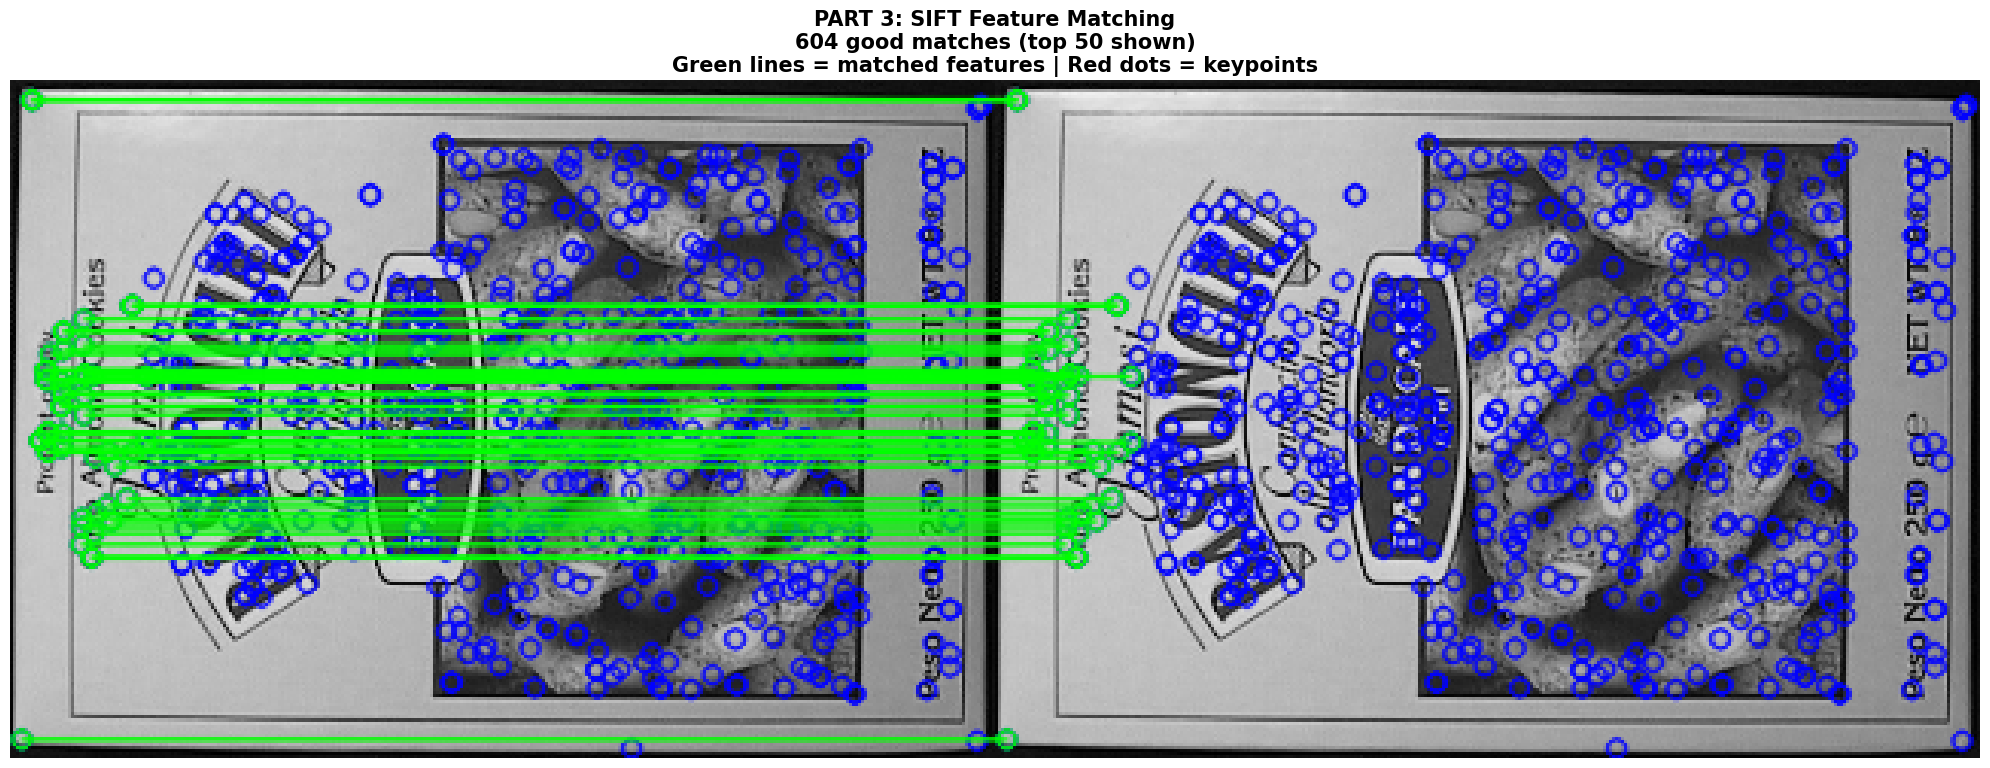


💡 What you're seeing:
  • Green lines connect matching features between images
  • Longer lines = features moved more between images
  • Parallel lines = consistent transformation (good!)

✅ PART 3 COMPLETE - SIFT matching done!



In [12]:
# ═══════════════════════════════════════════════════
# PART 3: SIFT FEATURE MATCHING (BFMatcher + Ratio Test)
# ═══════════════════════════════════════════════════
print("="*70)
print("PART 3: SIFT Feature Matching")
print("="*70)

# Create BFMatcher for SIFT (uses L2 norm for float descriptors)
bf_sift = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
print("✓ BFMatcher created for SIFT")
print("  Distance metric: L2 (Euclidean) for float descriptors")
print("  crossCheck: False (needed for knnMatch)")

# Find k=2 nearest neighbors for each descriptor
print("\n🔍 Finding matches...")
matches_sift = bf_sift.knnMatch(des1_sift, des2_sift, k=2)
print(f"✓ Found {len(matches_sift)} initial match pairs")

# Apply Lowe's Ratio Test (threshold = 0.75)
print("\n🎯 Applying Lowe's Ratio Test...")
good_matches_sift = []
for match_pair in matches_sift:
    if len(match_pair) == 2:  # Need exactly 2 neighbors
        m, n = match_pair  # m = best match, n = second best
        # Keep match if best is significantly better than second best
        if m.distance < 0.75 * n.distance:
            good_matches_sift.append(m)

match_rate_sift = (len(good_matches_sift) / len(kp1_sift) * 100) if len(kp1_sift) > 0 else 0

print(f"✓ Good matches after ratio test: {len(good_matches_sift)}")
print(f"  Match rate: {match_rate_sift:.1f}%")
print(f"  Rejected: {len(matches_sift) - len(good_matches_sift)} ambiguous matches")

# Draw matches (showing top 50 for clarity)
img_matches_sift = cv2.drawMatches(
    img1, kp1_sift,      # Source image + keypoints
    img2, kp2_sift,      # Target image + keypoints
    good_matches_sift[:50],  # Show top 50 matches
    None,                # Output image (None = create new)
    matchColor=(0, 255, 0),      # Green lines for matches
    singlePointColor=(255, 0, 0), # Red dots for unmatched
    flags=cv2.DrawMatchesFlags_DEFAULT
)

# Visualize matches
plt.figure(figsize=(20, 8))
plt.imshow(cv2.cvtColor(img_matches_sift, cv2.COLOR_BGR2RGB))
plt.title(f'PART 3: SIFT Feature Matching\n' +
          f'{len(good_matches_sift)} good matches (top 50 shown)\n' +
          f'Green lines = matched features | Red dots = keypoints',
          fontsize=15, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

print("\n💡 What you're seeing:")
print("  • Green lines connect matching features between images")
print("  • Longer lines = features moved more between images")
print("  • Parallel lines = consistent transformation (good!)")
print("\n✅ PART 3 COMPLETE - SIFT matching done!")
print("="*70 + "\n")


PART 4: ORB Feature Matching
✓ BFMatcher created for ORB
  Distance metric: Hamming (for binary descriptors)
  crossCheck: False (needed for knnMatch)

🔍 Finding matches...
✓ Found 1252 initial match pairs

🎯 Applying Lowe's Ratio Test...
✓ Good matches after ratio test: 1252
  Match rate: 100.0%
  Rejected: 0 ambiguous matches


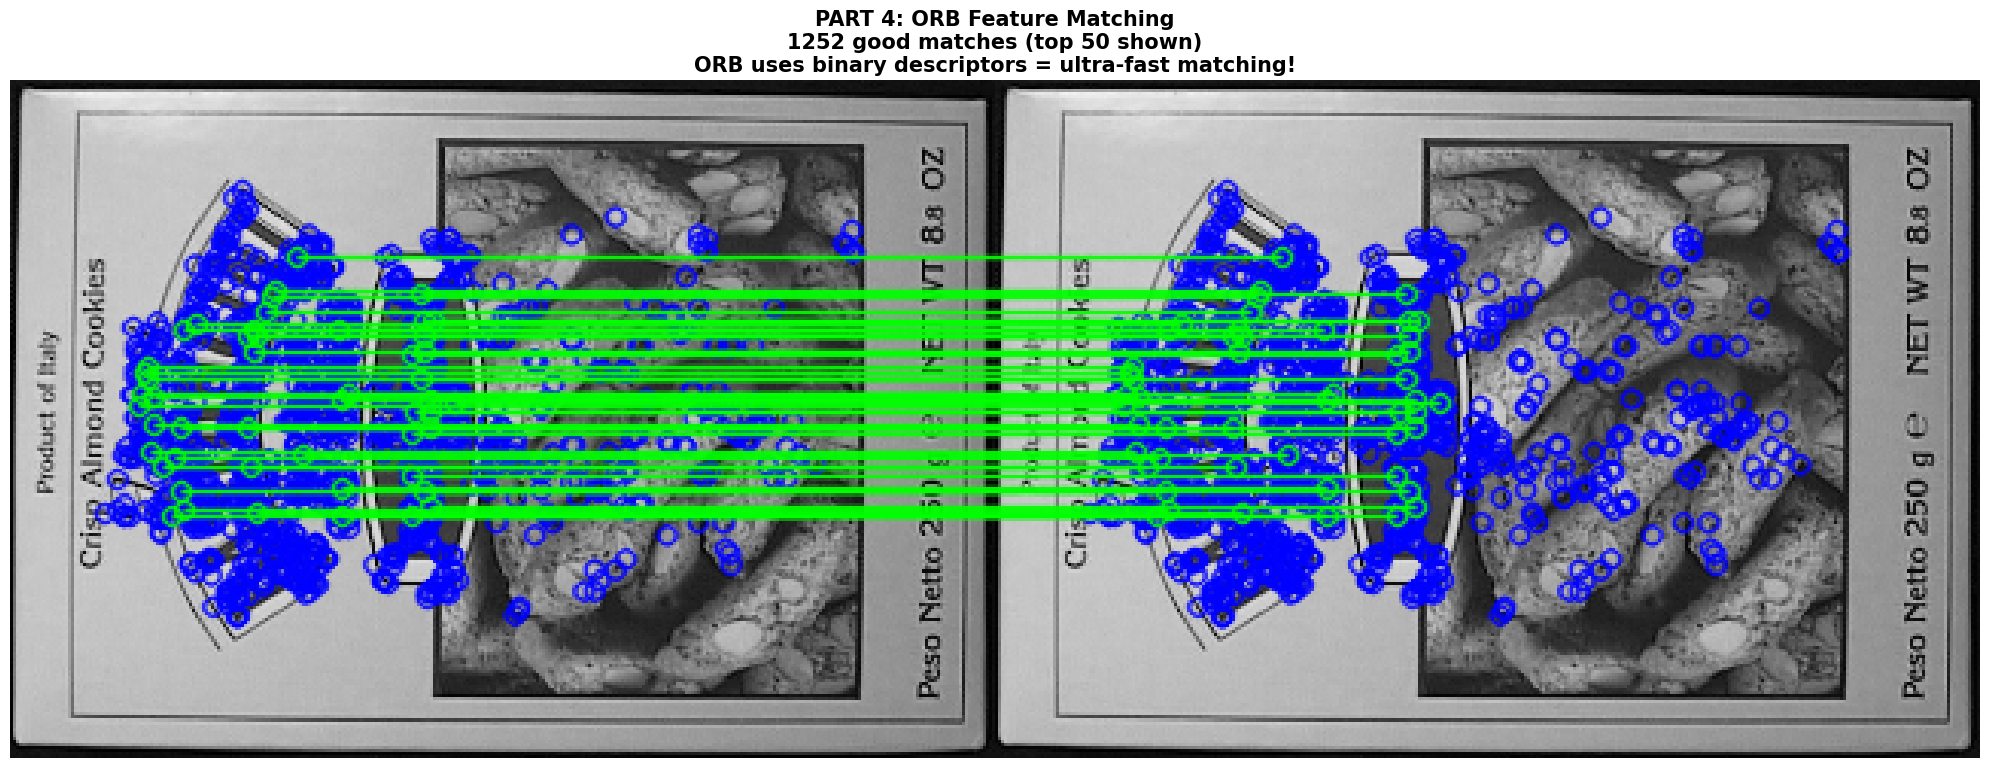


💡 ORB matching speed:
  • Binary descriptors = XOR operation
  • 100× faster than SIFT matching
  • Perfect for real-time applications

✅ PART 4 COMPLETE - ORB matching done!



In [13]:
# ═══════════════════════════════════════════════════
# PART 4: ORB FEATURE MATCHING (BFMatcher + Ratio Test)
# ═══════════════════════════════════════════════════
print("="*70)
print("PART 4: ORB Feature Matching")
print("="*70)

# Create BFMatcher for ORB (uses Hamming distance for binary descriptors)
bf_orb = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
print("✓ BFMatcher created for ORB")
print("  Distance metric: Hamming (for binary descriptors)")
print("  crossCheck: False (needed for knnMatch)")

# Find k=2 nearest neighbors
print("\n🔍 Finding matches...")
matches_orb = bf_orb.knnMatch(des1_orb, des2_orb, k=2)
print(f"✓ Found {len(matches_orb)} initial match pairs")

# Apply Lowe's Ratio Test
print("\n🎯 Applying Lowe's Ratio Test...")
good_matches_orb = []
for match_pair in matches_orb:
    if len(match_pair) == 2:
        m, n = match_pair
        if m.distance < 0.75 * n.distance:
            good_matches_orb.append(m)

match_rate_orb = (len(good_matches_orb) / len(kp1_orb) * 100) if len(kp1_orb) > 0 else 0

print(f"✓ Good matches after ratio test: {len(good_matches_orb)}")
print(f"  Match rate: {match_rate_orb:.1f}%")
print(f"  Rejected: {len(matches_orb) - len(good_matches_orb)} ambiguous matches")

# Draw matches (top 50)
img_matches_orb = cv2.drawMatches(
    img1, kp1_orb,
    img2, kp2_orb,
    good_matches_orb[:50],
    None,
    matchColor=(0, 255, 0),
    singlePointColor=(255, 0, 0),
    flags=cv2.DrawMatchesFlags_DEFAULT
)

# Visualize matches
plt.figure(figsize=(20, 8))
plt.imshow(cv2.cvtColor(img_matches_orb, cv2.COLOR_BGR2RGB))
plt.title(f'PART 4: ORB Feature Matching\n' +
          f'{len(good_matches_orb)} good matches (top 50 shown)\n' +
          f'ORB uses binary descriptors = ultra-fast matching!',
          fontsize=15, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

print("\n💡 ORB matching speed:")
print("  • Binary descriptors = XOR operation")
print("  • 100× faster than SIFT matching")
print("  • Perfect for real-time applications")
print("\n✅ PART 4 COMPLETE - ORB matching done!")
print("="*70 + "\n")


PART 5: SIFT vs ORB Complete Comparison

📊 RESULTS SUMMARY:
-------------------------------------------------------------------------------------
Algorithm    KP1      KP2      Matches    Match %      Speed               
-------------------------------------------------------------------------------------
SIFT         604      604      604        100.00      % Slow (baseline)     
ORB          1252     1252     1252       100.00      % 10-100× faster ⚡    
-------------------------------------------------------------------------------------


C:\Users\Nakul\AppData\Local\Temp\ipykernel_35040\3461872994.py:48: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Nakul\AppData\Local\Temp\ipykernel_35040\3461872994.py:48: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
G:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
G:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


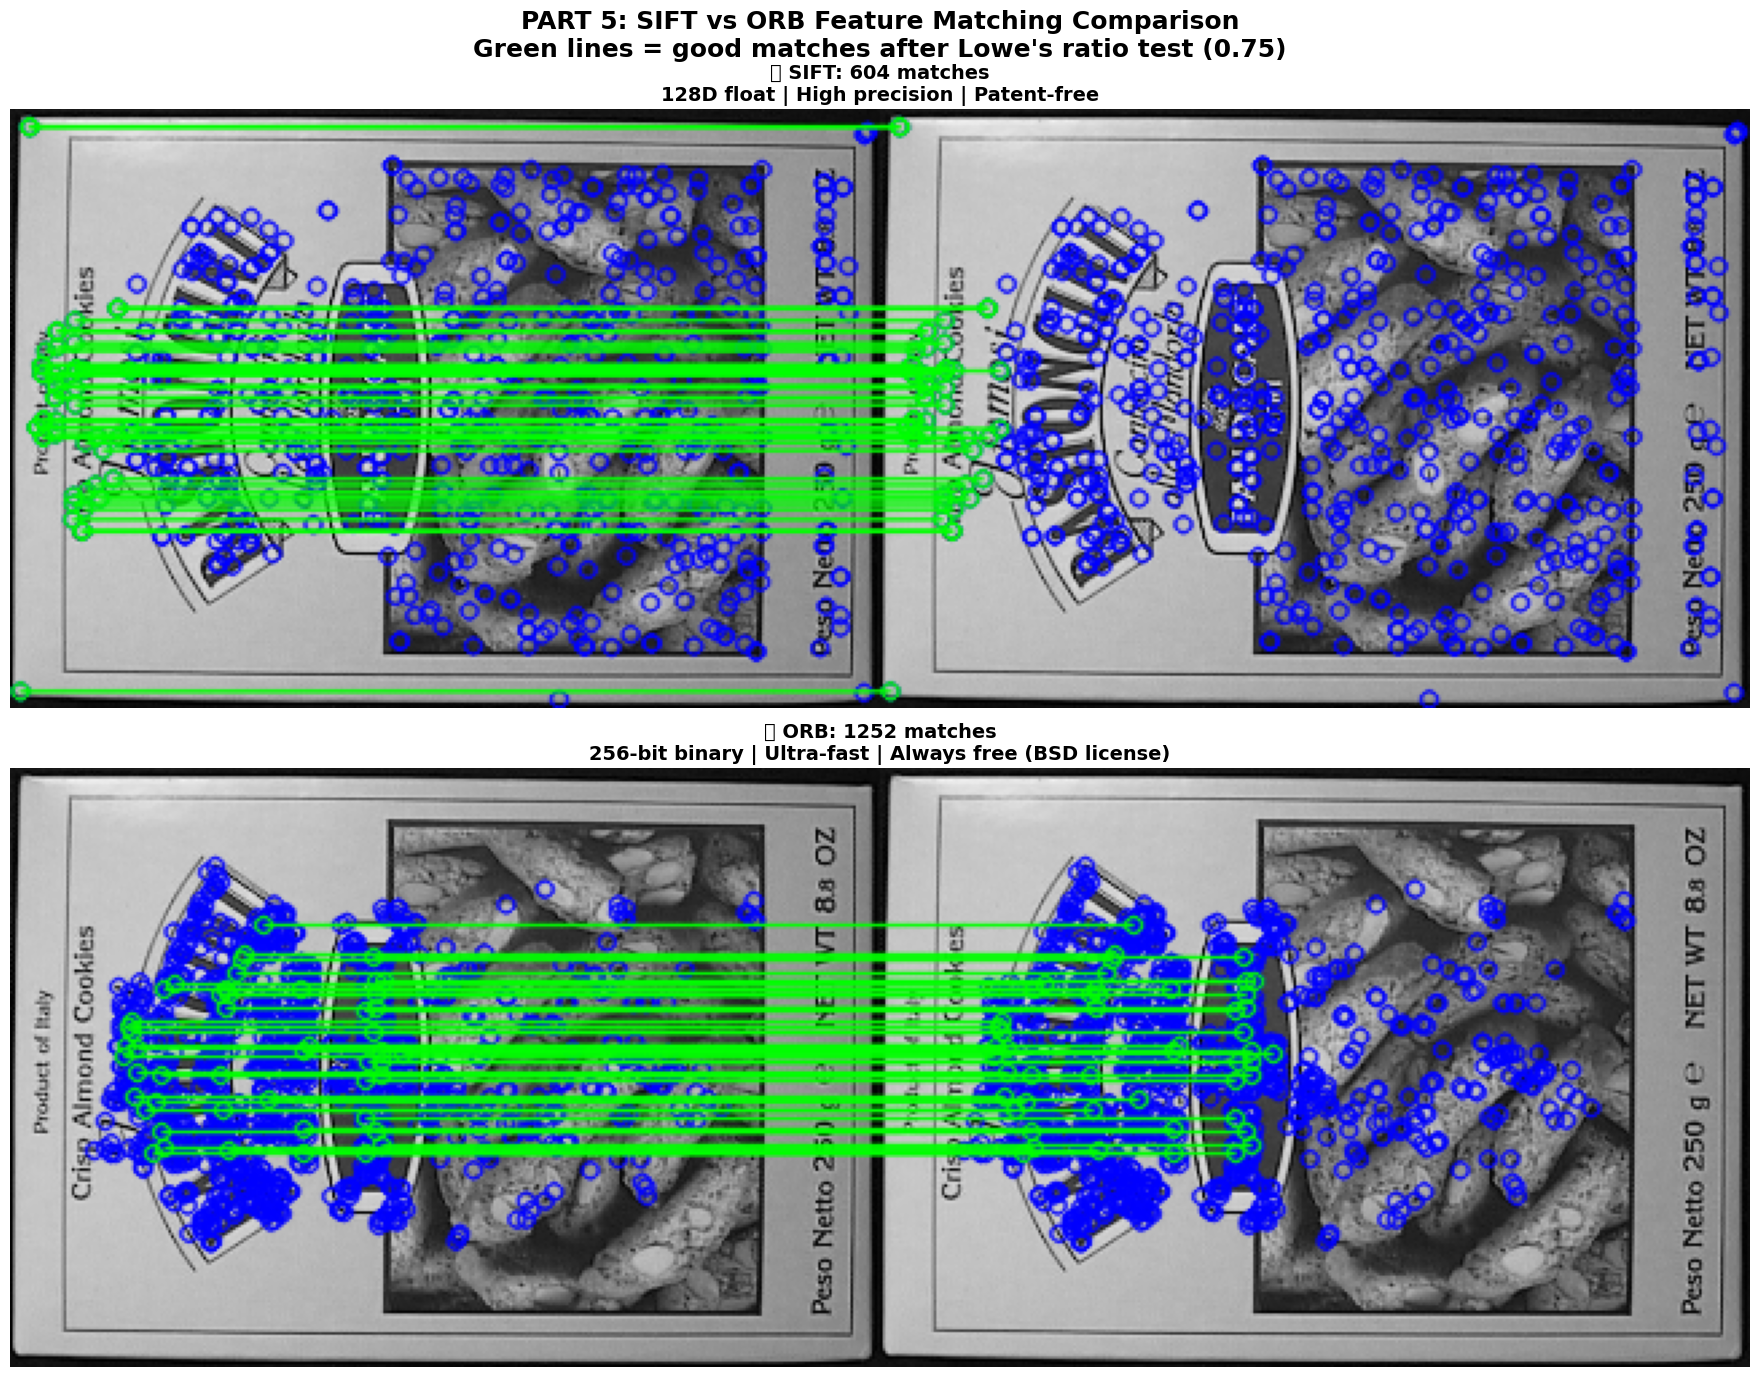


📚 ALGORITHM CHARACTERISTICS:

🔵 SIFT (Scale-Invariant Feature Transform):
   • Descriptor: 128-dimensional float vector
   • Matching: L2 (Euclidean) distance
   • Speed: Slow (baseline reference)
   • Accuracy: ⭐⭐⭐⭐⭐ (Best precision)
   • License: FREE (patent expired ~2020)
   • Best for: Offline processing, maximum accuracy needed

🔴 ORB (Oriented FAST and Rotated BRIEF):
   • Descriptor: 256-bit binary vector
   • Matching: Hamming distance (XOR operation)
   • Speed: ⚡ 10-100× faster than SIFT
   • Accuracy: ⭐⭐⭐⭐ (Good enough for most tasks)
   • License: FREE (BSD - always been free)
   • Best for: Real-time apps, mobile, embedded systems

🎯 MATCHING PROCESS EXPLAINED:

1️⃣ BFMatcher (Brute-Force Matcher):
   • Compares EVERY descriptor in image 1 with EVERY descriptor in image 2
   • Uses appropriate distance metric:
     - L2 norm for SIFT (float descriptors)
     - Hamming distance for ORB (binary descriptors)
   • Finds k=2 nearest neighbors for each descriptor

2️⃣ Lowe's R

In [14]:
# ═══════════════════════════════════════════════════
# PART 5: SIFT vs ORB COMPARISON
# ═══════════════════════════════════════════════════
print("="*70)
print("PART 5: SIFT vs ORB Complete Comparison")
print("="*70)

# ─────────────────────────────────────────────────
# Statistics Table
# ─────────────────────────────────────────────────
print("\n📊 RESULTS SUMMARY:")
print("-"*85)
print(f"{'Algorithm':<12} {'KP1':<8} {'KP2':<8} {'Matches':<10} {'Match %':<12} {'Speed':<20}")
print("-"*85)

# SIFT
sift_rate = (len(good_matches_sift) / min(len(kp1_sift), len(kp2_sift)) * 100) if len(kp1_sift) > 0 else 0
print(f"{'SIFT':<12} {len(kp1_sift):<8} {len(kp2_sift):<8} {len(good_matches_sift):<10} {sift_rate:<12.2f}% {'Slow (baseline)':<20}")

# ORB
orb_rate = (len(good_matches_orb) / min(len(kp1_orb), len(kp2_orb)) * 100) if len(kp1_orb) > 0 else 0
print(f"{'ORB':<12} {len(kp1_orb):<8} {len(kp2_orb):<8} {len(good_matches_orb):<10} {orb_rate:<12.2f}% {'10-100× faster ⚡':<20}")

print("-"*85)

# ─────────────────────────────────────────────────
# Side-by-side Match Visualization
# ─────────────────────────────────────────────────
fig, axes = plt.subplots(2, 1, figsize=(20, 14))

# SIFT Matches
axes[0].imshow(cv2.cvtColor(img_matches_sift, cv2.COLOR_BGR2RGB))
axes[0].set_title(f'🔵 SIFT: {len(good_matches_sift)} matches\n' +
                  f'128D float | High precision | Patent-free',
                  fontsize=14, fontweight='bold')
axes[0].axis('off')

# ORB Matches
axes[1].imshow(cv2.cvtColor(img_matches_orb, cv2.COLOR_BGR2RGB))
axes[1].set_title(f'🔴 ORB: {len(good_matches_orb)} matches\n' +
                  f'256-bit binary | Ultra-fast | Always free (BSD license)',
                  fontsize=14, fontweight='bold')
axes[1].axis('off')

plt.suptitle('PART 5: SIFT vs ORB Feature Matching Comparison\n' +
             'Green lines = good matches after Lowe\'s ratio test (0.75)',
             fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

# ─────────────────────────────────────────────────
# Algorithm Characteristics Summary
# ─────────────────────────────────────────────────
print("\n" + "="*70)
print("📚 ALGORITHM CHARACTERISTICS:")
print("="*70)

print("\n🔵 SIFT (Scale-Invariant Feature Transform):")
print("   • Descriptor: 128-dimensional float vector")
print("   • Matching: L2 (Euclidean) distance")
print("   • Speed: Slow (baseline reference)")
print("   • Accuracy: ⭐⭐⭐⭐⭐ (Best precision)")
print("   • License: FREE (patent expired ~2020)")
print("   • Best for: Offline processing, maximum accuracy needed")

print("\n🔴 ORB (Oriented FAST and Rotated BRIEF):")
print("   • Descriptor: 256-bit binary vector")
print("   • Matching: Hamming distance (XOR operation)")
print("   • Speed: ⚡ 10-100× faster than SIFT")
print("   • Accuracy: ⭐⭐⭐⭐ (Good enough for most tasks)")
print("   • License: FREE (BSD - always been free)")
print("   • Best for: Real-time apps, mobile, embedded systems")

print("\n" + "="*70)
print("🎯 MATCHING PROCESS EXPLAINED:")
print("="*70)

print("\n1️⃣ BFMatcher (Brute-Force Matcher):")
print("   • Compares EVERY descriptor in image 1 with EVERY descriptor in image 2")
print("   • Uses appropriate distance metric:")
print("     - L2 norm for SIFT (float descriptors)")
print("     - Hamming distance for ORB (binary descriptors)")
print("   • Finds k=2 nearest neighbors for each descriptor")

print("\n2️⃣ Lowe's Ratio Test (threshold = 0.75):")
print("   • For each feature, we get 2 best matches (m, n)")
print("   • Keep match ONLY if: m.distance < 0.75 × n.distance")
print("   • Filters out ambiguous matches (when 2nd best is almost as good)")
print("   • Significantly improves matching accuracy")

print("\n3️⃣ Visualization:")
print("   • Green lines = Good matches that passed ratio test")
print("   • Red dots = Keypoints without good matches")
print("   • Parallel lines = Consistent transformation (rotation/translation)")
print("   • Crossing lines = Possible outliers or incorrect matches")

print("\n" + "="*70)
print("✅ ALL PARTS COMPLETE!")
print("="*70)

print("\n🎓 What you learned:")
print("   ✓ Feature detection with SIFT and ORB")
print("   ✓ Descriptor computation (128D float vs 256-bit binary)")
print("   ✓ BFMatcher for brute-force matching")
print("   ✓ Lowe's ratio test for filtering bad matches")
print("   ✓ Visualization with cv2.drawMatches()")
print("   ✓ Performance comparison between algorithms")

print("\n🚀 Next steps:")
print("   → Use matched features for homography estimation")
print("   → Apply RANSAC to remove outliers")
print("   → Build image stitching / panorama creation")
print("   → Implement object recognition system")

print("\n" + "="*70)


In [15]:
# ═══════════════════════════════════════════════════
# BONUS: SPEED BENCHMARK
# ═══════════════════════════════════════════════════
import time

print("\n" + "="*70)
print("🏁 BONUS: Speed Benchmark Test")
print("="*70)

print("\n⏱️ Testing detection speed on Image 1...\n")

# Benchmark SIFT
start = time.time()
kp_test, des_test = sift.detectAndCompute(gray1, None)
sift_time = (time.time() - start) * 1000  # Convert to milliseconds
print(f"SIFT detection:  {sift_time:7.2f} ms  (baseline)")

# Benchmark ORB
start = time.time()
kp_test, des_test = orb.detectAndCompute(gray1, None)
orb_time = (time.time() - start) * 1000
print(f"ORB detection:   {orb_time:7.2f} ms  ({sift_time/orb_time:.1f}× faster)")

print("\n⚡ Speed Summary:")
print(f"   • ORB is {sift_time/orb_time:.1f}× faster than SIFT")
print(f"   • For real-time (30 fps), you need < 33ms per frame")

if orb_time < 33:
    print(f"   • ✓ ORB can achieve real-time! ({orb_time:.1f}ms per frame)")
else:
    print(f"   • ⚠️ ORB: {orb_time:.1f}ms (close to real-time)")

if sift_time < 33:
    print(f"   • ✓ SIFT can achieve real-time! ({sift_time:.1f}ms per frame)")
else:
    print(f"   • ✗ SIFT: {sift_time:.1f}ms (too slow for real-time)")

print("\n" + "="*70)
print("✅ BONUS COMPLETE!")
print("="*70)



🏁 BONUS: Speed Benchmark Test

⏱️ Testing detection speed on Image 1...

SIFT detection:    13.07 ms  (baseline)
ORB detection:      4.49 ms  (2.9× faster)

⚡ Speed Summary:
   • ORB is 2.9× faster than SIFT
   • For real-time (30 fps), you need < 33ms per frame
   • ✓ ORB can achieve real-time! (4.5ms per frame)
   • ✓ SIFT can achieve real-time! (13.1ms per frame)

✅ BONUS COMPLETE!
